In [1]:
import pandas as pd
from surprise.model_selection import train_test_split
from mlxtend.frequent_patterns import apriori, association_rules
import numpy as np
import ast
import pickle

In [2]:
## Loading data
books = pd.read_csv('data/books.csv', sep = ";", 
                    error_bad_lines=False, encoding='latin-1')

/tmp/ipykernel_27292/395589085.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  books = pd.read_csv('data/books.csv', sep = ";",
Skipping line 6452: expected 8 fields, saw 9
Skipping line 43667: expected 8 fields, saw 10
Skipping line 51751: expected 8 fields, saw 9

Skipping line 92038: expected 8 fields, saw 9
Skipping line 104319: expected 8 fields, saw 9
Skipping line 121768: expected 8 fields, saw 9

Skipping line 144058: expected 8 fields, saw 9
Skipping line 150789: expected 8 fields, saw 9
Skipping line 157128: expected 8 fields, saw 9
Skipping line 180189: expected 8 fields, saw 9
Skipping line 185738: expected 8 fields, saw 9

Skipping line 209388: expected 8 fields, saw 9
Skipping line 220626: expected 8 fields, saw 9
Skipping line 227933: expected 8 fields, saw 11
Skipping line 228957: expected 8 fields, saw 10
Skipping line 245933: expected 8 fields, saw 9
Skipping line 251296

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
  ## reduciing the column to the relevant
books = books[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication',
               'Publisher','Image-URL-L']]


In [5]:
## Renaming the columns
books.rename(columns={
    "Book-Title": "Title",
    "Book-Author": "Author",
    "Year-Of-Publication": "Year",
    "Image-URL-L": "image-url"}, inplace = True)


In [6]:
## users data and rating analysis
users = pd.read_csv("data/users.csv", sep = ";", 
                    error_bad_lines = False, encoding = 'latin-1')


/tmp/ipykernel_27292/275031468.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  users = pd.read_csv("data/users.csv", sep = ";",


In [7]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [8]:
ratings = pd.read_csv("data/ratings.csv", sep = ";", 
                      error_bad_lines = False, encoding = 'latin-1')


/tmp/ipykernel_27292/1164011593.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  ratings = pd.read_csv("data/ratings.csv", sep = ";",


In [9]:
    ## renaming
ratings.rename(columns={
    "User-ID": "User_id",
    "Book-Rating": "Rating"}, inplace = True)


In [10]:
users.rename(columns={
    "User-ID": "User_id"}, inplace = True)


In [11]:
x = ratings['User_id'].value_counts()>200
y = x[x].index
ratings = ratings[ratings["User_id"].isin(y)]


In [12]:
rating_with_books = ratings.merge(books, on = "ISBN")
num_rating = rating_with_books.groupby("Title")["Rating"].count().reset_index()


In [13]:
num_rating.rename(columns={"Rating":"No_of_rating"}, inplace=True)

    ## merging
final_rating = rating_with_books.merge(num_rating, on = "Title")
    ## cleaning
final_rating = final_rating[final_rating["No_of_rating"] >=50]
final_rating.drop_duplicates(["User_id", "Title"], inplace=True)
final_rating

,User_id,ISBN,Rating,Title,Author,Year,Publisher,image-url,No_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
...,...,...,...,...,...,...,...,...,...
236701,255489,0553579983,7,And Then You Die,Iris Johansen,1998,Bantam,http://images.amazon.com/images/P/0553579983.0...,50
236702,256407,0553579983,0,And Then You Die,Iris Johansen,1998,Bantam,http://images.amazon.com/images/P/0553579983.0...,50
236703,257204,0553579983,0,And Then You Die,Iris Johansen,1998,Bantam,http://images.amazon.com/images/P/0553579983.0...,50
236704,261829,0553579983,0,And Then You Die,Iris Johansen,1998,Bantam,http://images.amazon.com/images/P/0553579983.0...,50


In [14]:
pivot = final_rating.pivot_table(index='User_id', columns='Title', values='Rating')


In [15]:
basket = pivot.notnull().astype('int')
basket.head()

Title,1984,1st to Die: A Novel,2nd Chance,4 Blondes,84 Charing Cross Road,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Civil Action,A Cry In The Night,...,Winter Solstice,Wish You Well,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Wuthering Heights,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
User_id,,,,,,,,,,,,,,,,,,,,,
254,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2276,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2766,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3363,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
#apply the function to data using applymap
basket_sets = basket.applymap(encode_units)
basket_sets.shape

(888, 742)

In [17]:
# Split your data into training and testing sets
train_data = basket_sets[:800]
test_data = basket_sets[800:]

In [18]:
#Generating itemsets using apriori
frequent_itemsets = apriori(basket_sets, min_support = 0.07, use_colnames = True)
frequent_itemsets.head()
frequent_itemsets.shape

(1016, 2)

In [19]:
rules = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 1)
rules.shape

(1206, 9)

In [20]:
rules[ (rules['lift'] >= 6) &
      (rules['confidence'] >= 0.8)]
rules.shape

(1206, 9)

In [21]:
rules.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1st to Die: A Novel),(2nd Chance),0.172297,0.129505,0.075450,0.437908,3.381415,0.053137,1.548672
1,(2nd Chance),(1st to Die: A Novel),0.129505,0.172297,0.075450,0.582609,3.381415,0.053137,1.983038
2,(1st to Die: A Novel),(A Painted House),0.172297,0.238739,0.075450,0.437908,1.834258,0.034316,1.354337
3,(A Painted House),(1st to Die: A Novel),0.238739,0.172297,0.075450,0.316038,1.834258,0.034316,1.210158
4,(1st to Die: A Novel),(Violets Are Blue),0.172297,0.159910,0.072072,0.418301,2.615852,0.044520,1.444200


In [22]:
book_name = basket_sets.columns

In [23]:
#lists for string the antecedents and consequents
rules_list = []
for i in rules['antecedents']:
    string_set = str(i)
    list_id = '[' + string_set[11:-2] + ']'
    list_id = ast.literal_eval(list_id)
    rules_list.append(list_id)
    
book_strings = [book[0] for book in rules_list]
unique_books = (set(book_strings))

In [29]:
# Define the book of your choosing
my_book = 'Congo'

# Create an empty set to store the recommendations
my_recommendations = set([my_book])

# Loop over each rule and check if it contains the chosen book in the antecedents
for _, row in rules.iterrows():
    if my_book in row['antecedents']:
        # If the book is in the antecedents, add the consequents to the recommendations set
        my_recommendations.update(row['consequents'])

# Print the set of recommendations for the chosen book
print(f"Recommendations for '{my_book}':")
for book in my_recommendations:
    print(book)


Recommendations for 'Congo':
Congo
The Firm
The Pelican Brief
A Time to Kill


<Axes: xlabel='lift', ylabel='confidence'>

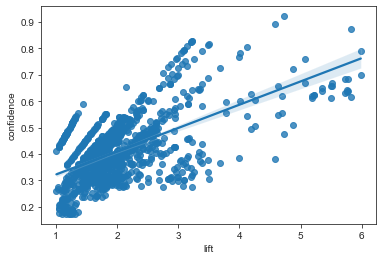

In [30]:
import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')

sns.regplot(x='lift', y='confidence', data=rules)


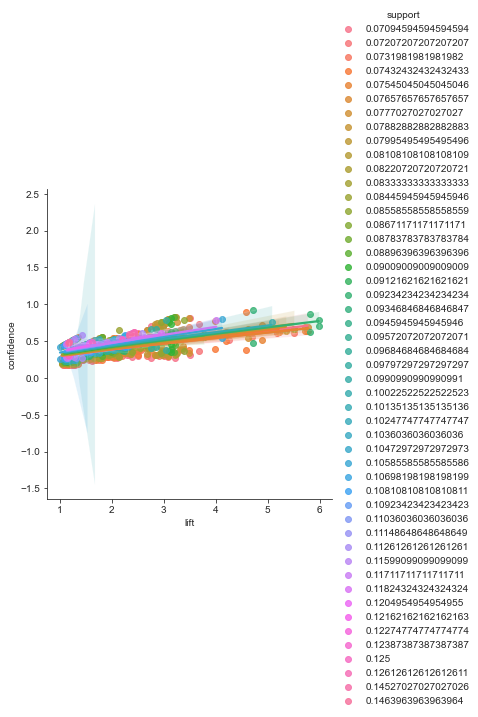

In [31]:
sns.lmplot(x='lift', y='confidence', hue='support', data=rules)

In [33]:
# Find users who bought "The Firm" in the testing set
test_users = set(final_rating[final_rating['Title'] == my_book]['User_id'])
# Evaluate the accuracy of the recommendations
total_recommendations = 0
correct_recommendations = 0
for user in test_users:
    user_bought_items = set(final_rating[final_rating['User_id'] == user]['Title'])
    recommendations = set()
    for _, row in rules.iterrows():
        if 'The Firm' in row['antecedents'] and set(row['antecedents']).issubset(user_bought_items):
            recommendations.update(row['consequents'])
    total_recommendations += len(recommendations)
    correct_recommendations += len(recommendations.intersection(user_bought_items))
accuracy = correct_recommendations / total_recommendations
print(f"Accuracy: {accuracy}")

Accuracy: 0.47745358090185674


In [34]:
pickle.dump(rules, open('artifacts/rules.pkl', 'wb'))
pickle.dump(unique_books, open('artifacts/unique_books.pkl', 'wb'))
pickle.dump(final_rating, open('artifacts/final_rating.pkl', 'wb'))
pickle.dump(basket_sets, open('artifacts/basket_sets.pkl', 'wb'))